# 1 - Import libraries

In [3]:
pip install tensorflow

   ---------------------------------------- 0.0/332.0 MB ? eta -:--:--
    --------------------------------------- 5.8/332.0 MB 35.0 MB/s eta 0:00:10
   - -------------------------------------- 12.8/332.0 MB 34.6 MB/s eta 0:00:10
   -- ------------------------------------- 21.2/332.0 MB 36.3 MB/s eta 0:00:09
   --- ------------------------------------ 26.5/332.0 MB 34.1 MB/s eta 0:00:09
   --- ------------------------------------ 32.2/332.0 MB 32.7 MB/s eta 0:00:10
   ---- ----------------------------------- 37.7/332.0 MB 31.8 MB/s eta 0:00:10
   ----- ---------------------------------- 43.5/332.0 MB 31.3 MB/s eta 0:00:10
   ----- ---------------------------------- 48.8/332.0 MB 30.5 MB/s eta 0:00:10
   ------ --------------------------------- 54.3/332.0 MB 30.2 MB/s eta 0:00:10
   ------- -------------------------------- 60.3/332.0 MB 30.1 MB/s eta 0:00:10
   -------- ------------------------------- 66.6/332.0 MB 30.0 MB/s eta 0:00:09
   -------- ------------------------------- 71.6/3

In [4]:
# ============================================
# SECTION 1: IMPORT LIBRARIES
# ============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# Traditional ML
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix
)

# Deep Learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical

# Settings
sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 100
tf.random.set_seed(42)
np.random.seed(42)

print("✅ Libraries imported successfully!")
print(f"✅ TensorFlow version: {tf.__version__}")
print(f"✅ GPU available: {len(tf.config.list_physical_devices('GPU')) > 0}")


# ============================================
# SECTION 2: LOAD DATA
# ============================================

print("\n" + "="*80)
print("📂 LOADING CLEANED DATA")
print("="*80)

# Load cleaned dataset
df = pd.read_csv('02_cleaned_data.csv')

print(f"✅ Data loaded: {df.shape[0]:,} samples, {df.shape[1]} features")

# Get feature columns
final_features = [col for col in df.columns if col not in ['is_attack', 'label2']]

print(f"✅ Features: {len(final_features)}")

✅ Libraries imported successfully!
✅ TensorFlow version: 2.20.0
✅ GPU available: False

📂 LOADING CLEANED DATA
✅ Data loaded: 227,191 samples, 41 features
✅ Features: 39


# prepare data

In [5]:
print("\n" + "="*80)
print("🎯 PREPARING DATA - MULTI-CLASS CLASSIFICATION")
print("="*80)

# Target: label2 (attack types)
y = df['label2']

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

print(f"✅ Classes: {len(le.classes_)}")
print(f"✅ Class names: {le.classes_.tolist()}")

# Show distribution
print("\n📊 Class Distribution:")
for i, label in enumerate(le.classes_):
    count = sum(y_encoded == i)
    print(f"  {i}: {label:15s} → {count:6,} samples")

# Prepare features
X = df[final_features].values

print(f"\n✅ X shape: {X.shape}")
print(f"✅ y shape: {y_encoded.shape}")


🎯 PREPARING DATA - MULTI-CLASS CLASSIFICATION
✅ Classes: 8
✅ Class names: ['benign', 'bruteforce', 'ddos', 'dos', 'malware', 'mitm', 'recon', 'web']

📊 Class Distribution:
  0: benign          → 136,800 samples
  1: bruteforce      →  1,868 samples
  2: ddos            → 18,056 samples
  3: dos             → 18,420 samples
  4: malware         →  7,541 samples
  5: mitm            →  8,062 samples
  6: recon           → 33,648 samples
  7: web             →  2,796 samples

✅ X shape: (227191, 39)
✅ y shape: (227191,)


# Train / test 

In [14]:
print("\n" + "="*80)
print("📂 TRAIN/TEST SPLIT (80/20)")
print("="*80)

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded,
    test_size=0.2,
    random_state=42,
    stratify=y_encoded
)

print(f"✅ Train: {X_train.shape[0]:,} samples")
print(f"✅ Test:  {X_test.shape[0]:,} samples")


📂 TRAIN/TEST SPLIT (80/20)
✅ Train: 181,752 samples
✅ Test:  45,439 samples


# scaling

In [15]:
print("\n" + "="*80)
print("⚖️ FEATURE SCALING (StandardScaler)")
print("="*80)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Features scaled!")

# Convert labels to categorical (one-hot encoding for neural networks)
y_train_cat = to_categorical(y_train, num_classes=len(le.classes_))
y_test_cat = to_categorical(y_test, num_classes=len(le.classes_))

print(f"✅ Labels converted to categorical")
print(f"   y_train_cat shape: {y_train_cat.shape}")


⚖️ FEATURE SCALING (StandardScaler)
✅ Features scaled!
✅ Labels converted to categorical
   y_train_cat shape: (181752, 8)


# neural network 


🧠 MODEL 1: SIMPLE NEURAL NETWORK (3 Layers)
✅ Model built!
   Total parameters: 13,896


C:\Users\Microsoft\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "Simple_NN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           5,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 8)                   │             520 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,896 (54.28 KB)

 Trainable params: 13,896 (54.28 KB)

 Non-trainable params: 0 (0.00 B)


⏳ Training Simple Neural Network...
Epoch 1/50
1136/1136 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8384 - loss: 0.6094 - val_accuracy: 0.8769 - val_loss: 0.4537 - learning_rate: 0.0010
Epoch 2/50
1136/1136 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8740 - loss: 0.4864 - val_accuracy: 0.8839 - val_loss: 0.4277 - learning_rate: 0.0010
Epoch 3/50
1136/1136 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8805 - loss: 0.4597 - val_accuracy: 0.8877 - val_loss: 0.4069 - learning_rate: 0.0010
Epoch 4/50
1136/1136 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8868 - loss: 0.4338 - val_accuracy: 0.8994 - val_loss: 0.3813 - learning_rate: 0.0010
Epoch 5/50
1136/1136 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8934 - loss: 0.4107 - val_accuracy: 0.9037 - val_loss: 0.3647 - learning_rate: 0.0010
Epoch 6/50
1136/1136 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8976 - loss: 0.3959 - val_accuracy: 0.9065 - val_loss: 0.3538 - learning_rate: 0.0010
Epoch 7/50
1136/1136 ━━━━━━━━━━━━━━━━━━

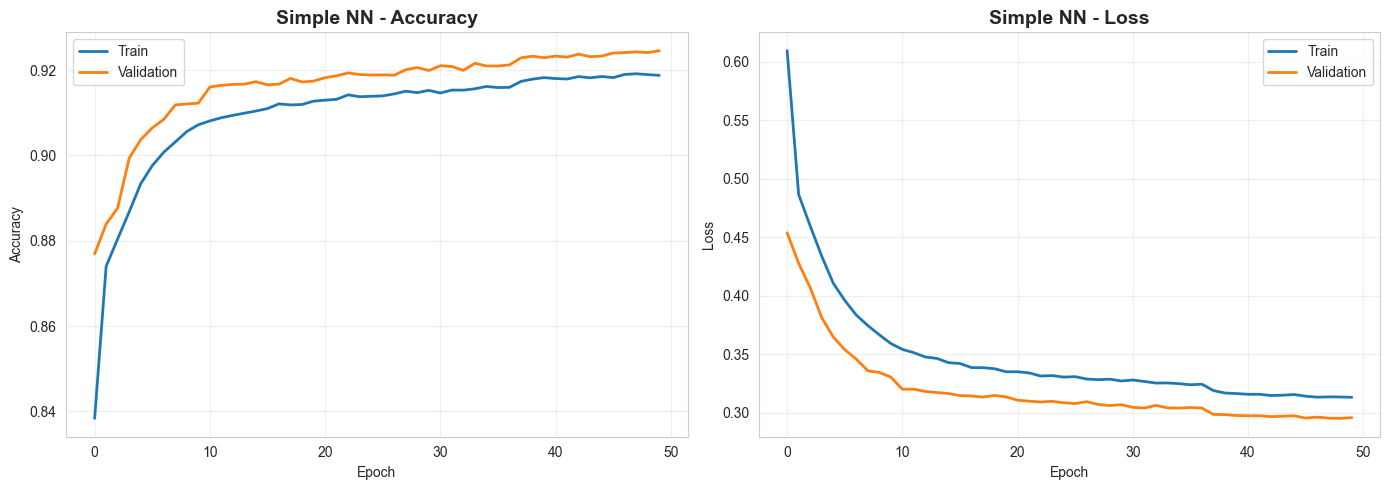

In [16]:
print("\n" + "="*80)
print("🧠 MODEL 1: SIMPLE NEURAL NETWORK (3 Layers)")
print("="*80)

# Build model
model_simple = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(len(le.classes_), activation='softmax')
], name='Simple_NN')

model_simple.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("✅ Model built!")
print(f"   Total parameters: {model_simple.count_params():,}")

# Model summary
model_simple.summary()

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

# Train
print("\n⏳ Training Simple Neural Network...")
history_simple = model_simple.fit(
    X_train_scaled, y_train_cat,
    validation_split=0.2,
    epochs=50,
    batch_size=128,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

print("✅ Training complete!")

# Evaluate
y_pred_simple_proba = model_simple.predict(X_test_scaled)
y_pred_simple = np.argmax(y_pred_simple_proba, axis=1)

acc = accuracy_score(y_test, y_pred_simple)
f1 = f1_score(y_test, y_pred_simple, average='weighted')

print(f"\n🎯 Test Set Performance:")
print(f"   Accuracy:  {acc:.4f}")
print(f"   F1-Score:  {f1:.4f}")

# Per-class performance
print("\n📋 Per-Class Performance:")
for i, attack_type in enumerate(le.classes_):
    mask = y_test == i
    if sum(mask) > 0:
        correct = sum((y_test == i) & (y_pred_simple == i))
        total = sum(mask)
        acc_class = correct / total
        emoji = "🟢" if acc_class >= 0.95 else "🟡" if acc_class >= 0.85 else "🔴"
        print(f"   {emoji} {attack_type:15s}: {correct:5,}/{total:5,} ({acc_class*100:5.1f}%)")

# Plot training history
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Accuracy
axes[0].plot(history_simple.history['accuracy'], label='Train', linewidth=2)
axes[0].plot(history_simple.history['val_accuracy'], label='Validation', linewidth=2)
axes[0].set_title('Simple NN - Accuracy', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Loss
axes[1].plot(history_simple.history['loss'], label='Train', linewidth=2)
axes[1].plot(history_simple.history['val_loss'], label='Validation', linewidth=2)
axes[1].set_title('Simple NN - Loss', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()


In [17]:
print("\n" + "="*80)
print("🧠 MODEL 2: DEEP NEURAL NETWORK (5 Layers)")
print("="*80)

# Build deeper model
model_deep = Sequential([
    Dense(256, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    BatchNormalization(),
    Dropout(0.4),
    
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(32, activation='relu'),
    Dropout(0.3),
    
    Dense(len(le.classes_), activation='softmax')
], name='Deep_NN')

model_deep.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("✅ Model built!")
print(f"   Total parameters: {model_deep.count_params():,}")

# Train
print("\n⏳ Training Deep Neural Network...")
history_deep = model_deep.fit(
    X_train_scaled, y_train_cat,
    validation_split=0.2,
    epochs=50,
    batch_size=128,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

print("✅ Training complete!")

# Evaluate
y_pred_deep_proba = model_deep.predict(X_test_scaled)
y_pred_deep = np.argmax(y_pred_deep_proba, axis=1)

acc = accuracy_score(y_test, y_pred_deep)
f1 = f1_score(y_test, y_pred_deep, average='weighted')

print(f"\n🎯 Test Set Performance:")
print(f"   Accuracy:  {acc:.4f}")
print(f"   F1-Score:  {f1:.4f}")

# Per-class performance
print("\n📋 Per-Class Performance:")
for i, attack_type in enumerate(le.classes_):
    mask = y_test == i
    if sum(mask) > 0:
        correct = sum((y_test == i) & (y_pred_deep == i))
        total = sum(mask)
        acc_class = correct / total
        emoji = "🟢" if acc_class >= 0.95 else "🟡" if acc_class >= 0.85 else "🔴"
        print(f"   {emoji} {attack_type:15s}: {correct:5,}/{total:5,} ({acc_class*100:5.1f}%)")


# ============================================
# SECTION 8: MODEL 3 - 1D CNN
# ============================================

print("\n" + "="*80)
print("🧠 MODEL 3: 1D CONVOLUTIONAL NEURAL NETWORK")
print("="*80)

# Reshape data for CNN (samples, timesteps, features)
# Treat features as a sequence
X_train_cnn = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_cnn = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

print(f"✅ Data reshaped for CNN:")
print(f"   X_train_cnn: {X_train_cnn.shape}")

# Build CNN model
model_cnn = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),
    
    Conv1D(128, kernel_size=3, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(len(le.classes_), activation='softmax')
], name='CNN_1D')

model_cnn.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("✅ Model built!")
print(f"   Total parameters: {model_cnn.count_params():,}")

# Train
print("\n⏳ Training 1D CNN...")
history_cnn = model_cnn.fit(
    X_train_cnn, y_train_cat,
    validation_split=0.2,
    epochs=50,
    batch_size=128,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

print("✅ Training complete!")

# Evaluate
y_pred_cnn_proba = model_cnn.predict(X_test_cnn)
y_pred_cnn = np.argmax(y_pred_cnn_proba, axis=1)

acc = accuracy_score(y_test, y_pred_cnn)
f1 = f1_score(y_test, y_pred_cnn, average='weighted')

print(f"\n🎯 Test Set Performance:")
print(f"   Accuracy:  {acc:.4f}")
print(f"   F1-Score:  {f1:.4f}")

# Per-class performance
print("\n📋 Per-Class Performance:")
for i, attack_type in enumerate(le.classes_):
    mask = y_test == i
    if sum(mask) > 0:
        correct = sum((y_test == i) & (y_pred_cnn == i))
        total = sum(mask)
        acc_class = correct / total
        emoji = "🟢" if acc_class >= 0.95 else "🟡" if acc_class >= 0.85 else "🔴"
        print(f"   {emoji} {attack_type:15s}: {correct:5,}/{total:5,} ({acc_class*100:5.1f}%)")


🧠 MODEL 2: DEEP NEURAL NETWORK (5 Layers)
✅ Model built!
   Total parameters: 55,528

⏳ Training Deep Neural Network...
Epoch 1/50


C:\Users\Microsoft\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1136/1136 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8188 - loss: 0.6775 - val_accuracy: 0.8755 - val_loss: 0.4682 - learning_rate: 0.0010
Epoch 2/50
1136/1136 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8686 - loss: 0.5210 - val_accuracy: 0.8838 - val_loss: 0.4396 - learning_rate: 0.0010
Epoch 3/50
1136/1136 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.8773 - loss: 0.4830 - val_accuracy: 0.8866 - val_loss: 0.4059 - learning_rate: 0.0010
Epoch 4/50
1136/1136 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.8856 - loss: 0.4483 - val_accuracy: 0.8996 - val_loss: 0.3803 - learning_rate: 0.0010
Epoch 5/50
1136/1136 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.8908 - loss: 0.4273 - val_accuracy: 0.9028 - val_loss: 0.3685 - learning_rate: 0.0010
Epoch 6/50
1136/1136 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.8967 - loss: 0.4042 - val_accuracy: 0.9085 - val_loss: 0.3564 - learning_rate: 5.0000e-04
Epoch 7/50
1136/1136 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9003 - loss: 

C:\Users\Microsoft\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1136/1136 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.8284 - loss: 0.6552 - val_accuracy: 0.8753 - val_loss: 0.4570 - learning_rate: 0.0010
Epoch 2/50
1136/1136 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - accuracy: 0.8699 - loss: 0.5052 - val_accuracy: 0.8869 - val_loss: 0.4206 - learning_rate: 0.0010
Epoch 3/50
1136/1136 ━━━━━━━━━━━━━━━━━━━━ 18s 16ms/step - accuracy: 0.8784 - loss: 0.4676 - val_accuracy: 0.8935 - val_loss: 0.3875 - learning_rate: 0.0010
Epoch 4/50
1136/1136 ━━━━━━━━━━━━━━━━━━━━ 18s 16ms/step - accuracy: 0.8864 - loss: 0.4356 - val_accuracy: 0.9048 - val_loss: 0.3665 - learning_rate: 0.0010
Epoch 5/50
1136/1136 ━━━━━━━━━━━━━━━━━━━━ 17s 15ms/step - accuracy: 0.8926 - loss: 0.4146 - val_accuracy: 0.9055 - val_loss: 0.3616 - learning_rate: 0.0010
Epoch 6/50
1136/1136 ━━━━━━━━━━━━━━━━━━━━ 21s 18ms/step - accuracy: 0.8995 - loss: 0.3874 - val_accuracy: 0.9122 - val_loss: 0.3383 - learning_rate: 5.0000e-04
Epoch 7/50
1136/1136 ━━━━━━━━━━━━━━━━━━━━ 19s 17ms/step - accuracy: 0.9